In [1]:
import sys
sys.path.insert(0, '/cndd/fangming/CEMBA/snmcseq_dev')

import h5py

from __init__ import *
from __init__jupyterlab import *

import snmcseq_utils

### Read in RS2 cells

In [2]:
f = '/cndd2/fangming/projects/miniatlas/rs2/cell_2111_MOp.hdf5'
f = h5py.File(f, 'r')
list(f.keys())

['genes', 'meta', 'rate_gene_ch']

In [3]:
genes = f['genes'][()]
genes = pd.DataFrame(genes, columns=['chr', 'start', 'end', 'strand', 'gene_id', 'gene_name'])
print(genes.shape)
genes.head()

(12261, 6)


,chr,start,end,strand,gene_id,gene_name
0,chr1,3205900,3671498,-1,ENSMUSG00000051951,Xkr4
1,chr1,3466586,3513553,1,ENSMUSG00000089699,Gm1992
2,chr1,3905738,3986215,-1,ENSMUSG00000102343,Gm37381
3,chr1,3999556,4409241,-1,ENSMUSG00000025900,Rp1
4,chr1,4292980,4409187,-1,ENSMUSG00000109048,Rp1


In [4]:
meta = f['meta'][()]
meta = pd.DataFrame(meta[1:, :], columns=meta[0, :]).astype({
    'mCCC': np.float, 
    'mCH': np.float, 
    'mCG': np.float, 
    '# Non-clonal reads': np.int, 
})
print(meta.shape)
meta.head()

(2111, 10)


,mCCC,mCH,mCG,# Non-clonal reads,Experiment,Source,Slice,Target,Gender,Major Type
0,0.006500,0.032027,0.775850,1090870,Tm3C,MOp,3C,SC,male,L5-ET
1,0.006709,0.034091,0.775146,1458065,Tf3C,MOp,3C,SC,female,L5-ET
2,0.007131,0.035900,0.775895,1614993,Tm4B,MOp,4B,SC,male,L5-ET
3,0.006032,0.028591,0.773345,1598778,Tf4B,MOp,4B,SC,female,L5-ET
4,0.005007,0.022022,0.773471,762007,Pm3C,MOp,3C,STR,male,L4


In [5]:
nmch = f['rate_gene_ch'][()]
nmch = pd.DataFrame(nmch.T, index=genes['gene_id'], columns=meta.index.values)

print(nmch.shape)
nmch.head()

(12261, 2111)


,0,1,2,3,4,5,6,7,8,9,...,2101,2102,2103,2104,2105,2106,2107,2108,2109,2110
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000051951,0.596484,0.562774,0.973410,0.827507,0.360398,0.394905,0.639581,0.465378,0.802192,0.970619,...,0.698528,0.786778,0.413391,0.853294,0.834699,0.949038,1.016534,0.479156,0.313435,0.844506
ENSMUSG00000089699,0.409485,0.666657,1.105788,0.849973,0.000000,0.593597,0.000000,0.459989,0.957563,1.186581,...,0.271223,0.855781,0.568027,0.806972,0.796711,1.057982,0.584903,0.554740,0.000000,1.005871
ENSMUSG00000102343,0.840626,0.924911,1.172054,0.825084,0.000000,0.763111,0.900269,0.939094,0.987396,0.907598,...,1.161791,0.726675,0.759260,0.830782,0.875541,0.890134,0.788926,1.150925,0.000000,0.766424
ENSMUSG00000025900,1.232800,1.019727,0.865994,0.785467,1.565866,0.638042,0.980718,0.615261,1.052833,0.980608,...,0.926816,0.773509,0.722706,1.106217,1.174742,1.067298,0.997026,0.812896,0.000000,0.852511
ENSMUSG00000109048,1.098876,0.752125,0.463248,0.495499,0.000000,0.393148,1.024092,0.551253,0.859545,0.924681,...,1.013985,0.703422,0.715443,0.876114,0.909458,1.088331,1.006497,0.696407,0.000000,0.748122


### Test

In [7]:
meta.loc[meta['Target']=='MB', 'Experiment'].unique()

array(['Um3C', 'Uf3C', 'Uf4B', 'Um4B'], dtype=object)

### Read in MOp cells 

In [6]:
f = '/cndd/fangming/CEMBA/data/MOp_all/results_final/miniatlas_fig4_scf_clusterings.tsv'
meta_mop = pd.read_csv(f, sep='\t')
print(meta_mop.shape)
meta_mop.head()

(408885, 11)


/cndd/fangming/venvs/conda_dobro/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,sample,joint_embedding_x,joint_embedding_y,modality,modality_name,single_modality_cluster,single_modality_annot,joint_cluster_round1,joint_cluster_round2,joint_cluster_round3,joint_cluster_round4
0,snmcseq_gene_2C_M_0,0.471629,-3.134735,snmcseq_gene,DNA methylation,L4-IT-Rorb_Rorb-Tenm2,L4-IT-Rorb_Rorb-Tenm2,1,1-1,1-1-1,1-1-1-1
1,snmcseq_gene_2C_M_1,-2.414973,-12.098081,snmcseq_gene,DNA methylation,L23-IT-Cux2,L23-IT-Cux2,4,4-2,4-2-1,4-2-1-1
2,snmcseq_gene_2C_M_100,-1.446751,-12.051894,snmcseq_gene,DNA methylation,L23-IT-Cux2,L23-IT-Cux2,4,4-1,4-1-1,4-1-1-1
3,snmcseq_gene_2C_M_1000,-1.901734,-13.660591,snmcseq_gene,DNA methylation,L23-IT-Cux2,L23-IT-Cux2,4,4-2,4-2-1,4-2-1-1
4,snmcseq_gene_2C_M_1001,-0.981086,-11.936621,snmcseq_gene,DNA methylation,L23-IT-Cux2,L23-IT-Cux2,4,4-1,4-1-1,4-1-1-1


In [63]:
f1 = '/cndd/fangming/CEMBA/data/MOp_all/results_final/miniatlas_fig4_scf_annotation_round1.tsv'
annot1 = pd.read_csv(f1, sep='\t', index_col=0)
annot1.head()

,annotation_curated,color
cluster_id_iterative,,
1,L4/5 IT,#3CBC78
2,L6 CT,#338C5E
3,L5/6 IT,#00CF1E
4,L2/3 IT,#6F836B
5,MGE,#BC2D71


In [64]:
f2 = '/cndd/fangming/CEMBA/data/MOp_all/results_final/miniatlas_fig4_scf_annotation_round2.tsv'
annot2 = pd.read_csv(f2, sep='\t', index_col=0)
annot2.head()

,annotation_curated,color
cluster_id_iterative,,
1-1,L4/5 IT (1),#3CBC78
1-2,L4/5 IT (2-3),#3CBC45
2-1,L6 CT Cpa6,#338C5E
2-2,L6 CT Cpa6_Gpr139,#338C5E
2-3,L6 CT Nxph2,#3E766C


In [65]:
f3 = '/cndd/fangming/CEMBA/data/MOp_all/results_final/miniatlas_fig4_scf_annotation_round3.tsv'
annot3 = pd.read_csv(f3, sep='\t', index_col=0)
annot3.head()

,annotation_curated,color
cluster_id_iterative,,
1-1-1,L4/5 IT (1),#3CBC78
1-2-1,L4/5 IT (2),#3CBC45
1-2-2,L4/5 IT (3),#5DDB65
2-1-1,L6 CT Cpa6 (1),#338C5E
2-1-2,L6 CT Cpa6 (2),#338C5E


In [10]:
f = '/cndd2/fangming/projects/miniatlas/cluster_level/gene_features_mch_round2.tsv'
mch_clst_r2 = pd.read_csv(f, sep='\t', index_col=0)
print(mch_clst_r2.shape)
mch_clst_r2.head()

(55487, 29)


,1-1,1-2,10-1,2-1,2-2,2-3,3-1,3-2,3-3,4-1,...,6-4,6-5,6-6,7-1,7-2,8-1,8-2,8-3,9-1,9-2
ENSMUSG00000102693,1.044560,1.476950,NaN,1.025669,1.008574,1.495035,0.979306,1.206219,0.685047,1.370644,...,0.949051,1.093439,NaN,1.177087,1.242193,1.161936,1.418161,NaN,1.918686,2.045048
ENSMUSG00000064842,1.661196,1.509376,NaN,1.678086,1.809794,3.154611,1.080897,1.949508,NaN,2.232879,...,NaN,NaN,NaN,1.422304,1.584148,NaN,1.523283,NaN,NaN,NaN
ENSMUSG00000051951,0.585127,0.474927,0.344345,0.512145,0.477052,0.676636,0.514763,0.491018,0.636024,0.681904,...,0.559300,0.690053,0.569982,0.604762,0.476163,0.323730,0.373701,0.575635,0.910935,0.793141
ENSMUSG00000102851,0.683337,0.586011,0.563786,0.675484,0.533206,0.901727,0.519407,0.548420,0.628998,0.827019,...,0.504147,1.152757,NaN,0.454943,0.580014,0.235509,0.322056,NaN,0.744506,1.097108
ENSMUSG00000103377,0.626740,0.494822,0.229791,0.583621,0.600681,0.794156,0.615635,0.630059,0.836263,0.920820,...,0.425873,0.690416,0.000000,1.412396,1.229969,0.352934,0.388527,0.496988,0.711115,1.169370


In [11]:
f = '/cndd2/fangming/projects/miniatlas/cluster_level/gene_features_mch_round3.tsv'
mch_clst_r3 = pd.read_csv(f, sep='\t', index_col=0)
print(mch_clst_r3.shape)
mch_clst_r3.head()

(55487, 56)


,1-1-1,1-2-1,1-2-2,10-1-1,2-1-1,2-1-2,2-2-1,2-2-2,2-2-3,2-2-4,...,7-2-1,7-2-2,8-1-1,8-1-2,8-2-1,8-3-1,8-3-2,9-1-1,9-2-1,9-2-2
ENSMUSG00000102693,1.044560,1.388850,1.814953,NaN,0.986151,1.137234,1.012576,0.885916,NaN,NaN,...,1.328039,1.165664,1.121309,1.281965,1.418161,NaN,NaN,1.918686,2.228684,NaN
ENSMUSG00000064842,1.661196,1.373328,1.862992,NaN,1.524579,2.004510,1.824358,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.523283,NaN,NaN,NaN,NaN,NaN
ENSMUSG00000051951,0.585127,0.492982,0.405509,0.344345,0.509483,0.519171,0.479962,0.395845,NaN,NaN,...,0.483934,0.468551,0.328460,0.312854,0.373701,0.575635,NaN,0.910935,0.810503,0.753209
ENSMUSG00000102851,0.683337,0.626976,0.475891,0.563786,0.666607,0.696489,0.534561,0.481144,NaN,NaN,...,0.561416,0.592265,0.267562,NaN,0.322056,NaN,NaN,0.744506,0.978352,1.284951
ENSMUSG00000103377,0.626740,0.512025,0.425547,0.229791,0.587109,0.574752,0.596842,0.676518,NaN,NaN,...,1.371550,1.124712,0.397388,0.202278,0.388527,0.496988,NaN,0.711115,1.022159,1.370970


In [32]:
clst_cond = mch_clst_r3.isnull().sum() == len(mch_clst_r3)
drop_clsts = clst_cond[clst_cond].index.values
print(drop_clsts)
mch_clst_r3 = mch_clst_r3.drop(drop_clsts, axis=1)
print(mch_clst_r3.shape)
mch_clst_r3.head()

['2-2-3' '2-2-4' '8-3-2']
(55487, 53)


,1-1-1,1-2-1,1-2-2,10-1-1,2-1-1,2-1-2,2-2-1,2-2-2,2-3-1,2-3-2,...,7-1-2,7-2-1,7-2-2,8-1-1,8-1-2,8-2-1,8-3-1,9-1-1,9-2-1,9-2-2
ENSMUSG00000102693,1.044560,1.388850,1.814953,NaN,0.986151,1.137234,1.012576,0.885916,1.489216,1.605704,...,1.261993,1.328039,1.165664,1.121309,1.281965,1.418161,NaN,1.918686,2.228684,NaN
ENSMUSG00000064842,1.661196,1.373328,1.862992,NaN,1.524579,2.004510,1.824358,NaN,2.665864,NaN,...,2.189376,NaN,NaN,NaN,NaN,1.523283,NaN,NaN,NaN,NaN
ENSMUSG00000051951,0.585127,0.492982,0.405509,0.344345,0.509483,0.519171,0.479962,0.395845,0.664061,0.627431,...,0.556561,0.483934,0.468551,0.328460,0.312854,0.373701,0.575635,0.910935,0.810503,0.753209
ENSMUSG00000102851,0.683337,0.626976,0.475891,0.563786,0.666607,0.696489,0.534561,0.481144,0.865600,1.225462,...,0.433418,0.561416,0.592265,0.267562,NaN,0.322056,NaN,0.744506,0.978352,1.284951
ENSMUSG00000103377,0.626740,0.512025,0.425547,0.229791,0.587109,0.574752,0.596842,0.676518,0.727876,0.910802,...,1.312456,1.371550,1.124712,0.397388,0.202278,0.388527,0.496988,0.711115,1.022159,1.370970


### Correlate 

In [33]:
common_genes = np.intersect1d(mch_clst_r3.index.values, nmch.index.values)
print(common_genes.shape)
common_genes

(12214,)


array(['ENSMUSG00000000001', 'ENSMUSG00000000028', 'ENSMUSG00000000049',
       ..., 'ENSMUSG00000110391', 'ENSMUSG00000110408',
       'ENSMUSG00000110424'], dtype=object)

In [49]:
f = '/cndd/fangming/CEMBA/data/MOp_all/data_freeze_neurons/snmcseq_gene_hvfeatures.gene'
hvgs = snmcseq_utils.import_single_textcol(f) 
common_genes = np.intersect1d(common_genes, hvgs)
print(common_genes.shape)
common_genes

(2447,)


array(['ENSMUSG00000000028', 'ENSMUSG00000000120', 'ENSMUSG00000000126',
       ..., 'ENSMUSG00000110264', 'ENSMUSG00000110373',
       'ENSMUSG00000110391'], dtype=object)

In [50]:
X = nmch.reindex(common_genes)
Y = mch_clst_r3.reindex(common_genes)
X = X.fillna(X.mean(axis=1), axis=0)
Y = Y.fillna(Y.mean(axis=1), axis=0)
print(X.shape, Y.shape)

In [54]:
corr = snmcseq_utils.spearman_corrcoef(X.T, Y.T)[:len(X.T), len(X.T):]
corr = pd.DataFrame(corr, index=X.columns, columns=Y.columns)
print(corr.shape)
corr.head()

(2111, 53)


,1-1-1,1-2-1,1-2-2,10-1-1,2-1-1,2-1-2,2-2-1,2-2-2,2-3-1,2-3-2,...,7-1-2,7-2-1,7-2-2,8-1-1,8-1-2,8-2-1,8-3-1,9-1-1,9-2-1,9-2-2
0,0.535992,0.563185,0.550989,0.454117,0.542228,0.554203,0.545386,0.522497,0.601838,0.611348,...,0.519702,0.523568,0.520382,0.509657,0.517163,0.524142,0.511845,0.655259,0.609900,0.592684
1,0.632277,0.675432,0.648674,0.529671,0.605374,0.618856,0.598482,0.578826,0.685105,0.736074,...,0.617377,0.624374,0.612786,0.573750,0.579202,0.590438,0.549362,0.742646,0.776052,0.755990
2,0.640406,0.683691,0.663980,0.551875,0.646259,0.660254,0.638186,0.618338,0.728474,0.757192,...,0.627746,0.631509,0.623839,0.595913,0.614852,0.614565,0.590577,0.816911,0.767528,0.768905
3,0.598256,0.645312,0.628893,0.512290,0.628449,0.639544,0.621120,0.601353,0.691993,0.718863,...,0.595793,0.603142,0.594816,0.579740,0.587778,0.588360,0.561322,0.769371,0.732360,0.727236
4,0.333831,0.317375,0.308118,0.227479,0.264311,0.265890,0.264827,0.248008,0.278224,0.268179,...,0.246038,0.245249,0.238034,0.248182,0.237413,0.236254,0.238285,0.255847,0.259035,0.256267


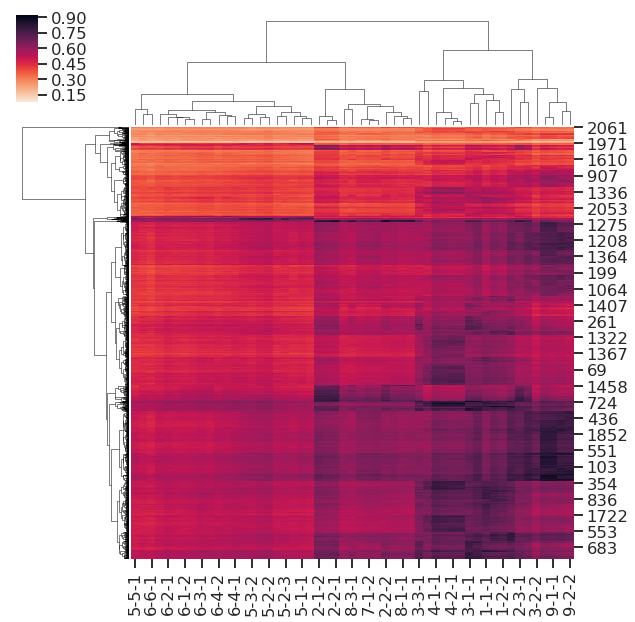

In [55]:
sns.clustermap(corr, cmap='rocket_r')

In [67]:
# assign to the best cluster
corr.idxmax(axis=1)
df_info = meta.copy()
df_info['best_match'] = corr.idxmax(axis=1)
df_info['best_match_annot'] = df_info['best_match'].apply(lambda x: annot3.loc[x, 'annotation_curated'])
print(df_info.shape)
df_info.head()

(2111, 12)


,mCCC,mCH,mCG,# Non-clonal reads,Experiment,Source,Slice,Target,Gender,Major Type,best_match,best_match_annot
0,0.006500,0.032027,0.775850,1090870,Tm3C,MOp,3C,SC,male,L5-ET,2-3-3,L6 CT Nxph2 Kit
1,0.006709,0.034091,0.775146,1458065,Tf3C,MOp,3C,SC,female,L5-ET,9-2-1,L5 PT (2)
2,0.007131,0.035900,0.775895,1614993,Tm4B,MOp,4B,SC,male,L5-ET,9-1-1,L5 PT (1)
3,0.006032,0.028591,0.773345,1598778,Tf4B,MOp,4B,SC,female,L5-ET,9-1-1,L5 PT (1)
4,0.005007,0.022022,0.773471,762007,Pm3C,MOp,3C,STR,male,L4,1-1-1,L4/5 IT (1)


In [68]:
df_info.groupby(['Major Type', 'best_match_annot']).size()

Major Type  best_match_annot      
CLA         L6 IT Car3                  3
Inh         Lamp5 Pax6                  2
            Lamp5 Pdlim5                2
            Lamp5 Slc35d3               2
            Pvalb Calb1                 7
            Pvalb Gabrg1                1
            Pvalb Reln                  5
            Pvalb Vipr2                 1
            Sncg Col14a1                1
            Sst Crhr2 (1)               4
            Sst Hspe                    1
            Sst Myh8                    3
            Vip Chat                    1
            Vip Igfbp6                  2
L2/3        L2/3 IT (1)               218
            L2/3 IT (3)               115
            L2/3 IT (4)                95
            L2/3 IT (5)                23
            L4/5 IT (1)                 7
L4          L2/3 IT (1)                 6
            L4/5 IT (1)               194
            L4/5 IT (2)                 3
            L4/5 IT (3)                 1

### Correlate 2  

In [69]:
common_genes = np.intersect1d(mch_clst_r2.index.values, nmch.index.values)
print(common_genes.shape)
common_genes

(12214,)


array(['ENSMUSG00000000001', 'ENSMUSG00000000028', 'ENSMUSG00000000049',
       ..., 'ENSMUSG00000110391', 'ENSMUSG00000110408',
       'ENSMUSG00000110424'], dtype=object)

In [70]:
f = '/cndd/fangming/CEMBA/data/MOp_all/data_freeze_neurons/snmcseq_gene_hvfeatures.gene'
hvgs = snmcseq_utils.import_single_textcol(f) 
common_genes = np.intersect1d(common_genes, hvgs)
print(common_genes.shape)
common_genes

(2447,)


array(['ENSMUSG00000000028', 'ENSMUSG00000000120', 'ENSMUSG00000000126',
       ..., 'ENSMUSG00000110264', 'ENSMUSG00000110373',
       'ENSMUSG00000110391'], dtype=object)

In [71]:
X = nmch.reindex(common_genes)
Y = mch_clst_r2.reindex(common_genes)
X = X.fillna(X.mean(axis=1), axis=0)
Y = Y.fillna(Y.mean(axis=1), axis=0)
print(X.shape, Y.shape)

(2447, 2111) (2447, 29)


In [72]:
corr = snmcseq_utils.spearman_corrcoef(X.T, Y.T)[:len(X.T), len(X.T):]
corr = pd.DataFrame(corr, index=X.columns, columns=Y.columns)
print(corr.shape)
corr.head()

(2111, 29)


,1-1,1-2,10-1,2-1,2-2,2-3,3-1,3-2,3-3,4-1,...,6-4,6-5,6-6,7-1,7-2,8-1,8-2,8-3,9-1,9-2
0,0.535992,0.562395,0.454117,0.546009,0.545568,0.622341,0.583628,0.597408,0.542551,0.564074,...,0.491648,0.464392,0.446609,0.514948,0.524347,0.515953,0.524142,0.511845,0.655259,0.610769
1,0.632277,0.672017,0.529671,0.609712,0.598846,0.710983,0.646438,0.712561,0.586519,0.654297,...,0.519926,0.492800,0.462175,0.604616,0.621335,0.579959,0.590438,0.549362,0.742646,0.777877
2,0.640406,0.682088,0.551875,0.650670,0.638486,0.757661,0.680379,0.730695,0.622261,0.654896,...,0.553727,0.528149,0.495366,0.618248,0.630569,0.605496,0.614565,0.590577,0.816911,0.775849
3,0.598256,0.643861,0.512290,0.632030,0.621565,0.718412,0.634244,0.691188,0.567256,0.622440,...,0.523528,0.491748,0.459715,0.588737,0.601750,0.586273,0.588360,0.561322,0.769371,0.738323
4,0.333831,0.316503,0.227479,0.264956,0.264677,0.278548,0.302512,0.296612,0.291961,0.317222,...,0.250201,0.247039,0.233339,0.245319,0.242779,0.247186,0.236254,0.238285,0.255847,0.261066


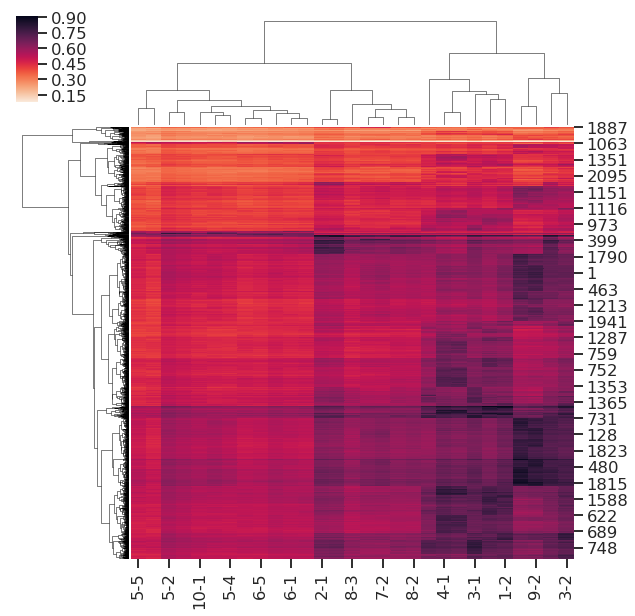

In [73]:
sns.clustermap(corr, cmap='rocket_r')

In [75]:
# assign to the best cluster
corr.idxmax(axis=1)
df_info = meta.copy()
df_info['best_match'] = corr.idxmax(axis=1)
df_info['best_match_annot'] = df_info['best_match'].apply(lambda x: annot2.loc[x, 'annotation_curated'])
print(df_info.shape)
df_info.head()

(2111, 12)


,mCCC,mCH,mCG,# Non-clonal reads,Experiment,Source,Slice,Target,Gender,Major Type,best_match,best_match_annot
0,0.006500,0.032027,0.775850,1090870,Tm3C,MOp,3C,SC,male,L5-ET,9-1,L5 PT (1)
1,0.006709,0.034091,0.775146,1458065,Tf3C,MOp,3C,SC,female,L5-ET,9-2,L5 PT (2-3)
2,0.007131,0.035900,0.775895,1614993,Tm4B,MOp,4B,SC,male,L5-ET,9-1,L5 PT (1)
3,0.006032,0.028591,0.773345,1598778,Tf4B,MOp,4B,SC,female,L5-ET,9-1,L5 PT (1)
4,0.005007,0.022022,0.773471,762007,Pm3C,MOp,3C,STR,male,L4,1-1,L4/5 IT (1)


In [76]:
df_info.groupby(['Major Type', 'best_match_annot']).size()

Major Type  best_match_annot     
CLA         L6 IT Car3                 3
Inh         Lamp5 Pdlim5_Pax6          4
            Lamp5 Slc35d3              2
            Pvalb Gabrg1               2
            Pvalb Reln_Calb1          11
            Pvalb Vipr2                1
            Sncg                       1
            Sst Calb2_Hspe             1
            Sst Myh8_Crhr2             7
            Vip Chat_Crispld2          1
            Vip Gpc3_Htr1f_lgfbp6      2
L2/3        L2/3 IT (1-2)            241
            L2/3 IT (3-5)            210
            L4/5 IT (1)                7
L4          L2/3 IT (1-2)              6
            L4/5 IT (1)              194
            L4/5 IT (2-3)              4
L5-ET       L5 PT (1)                458
            L5 PT (2-3)              390
L5-IT       L4/5 IT (1)               10
            L4/5 IT (2-3)             94
            L5 IT                     92
            L6(5) IT                   3
L6-CT       L6 CT Cpa6 

### what to produce 
- show major types are matched (heatmap)
- explore **target** vs cell types

In [ ]:
brain_regions = {
    'STR': 'Striatum', 
    'SSp': 'Primary somatosensory cortex', 
    'TH': 'Thalamus', 
    'ACA': 'Anterior cingulate area', 
    'SC': 'Superior colliculus', 
    'MB': 'Midbrain', 
    'Pons': 'Pons', 
    'MY': 'Medulla', 
}

In [78]:
print(meta['Source'].unique())
print(meta['Slice'].unique())
print(meta['Target'].unique())
print(meta['Gender'].unique())

['MOp']
['3C' '4B']
['SC' 'STR' 'SSp' 'TH' 'Pons' 'ACA' 'MY' 'MB']
['male' 'female']


In [83]:
print(df_info.groupby(['best_match_annot', 'Target']).size().to_string())

best_match_annot       Target
L2/3 IT (1-2)          ACA        76
                       MB          5
                       MY          2
                       Pons        1
                       SC          1
                       SSp       103
                       STR        57
                       TH          2
L2/3 IT (3-5)          ACA        58
                       MB          6
                       MY          1
                       Pons        5
                       SC          7
                       SSp        71
                       STR        59
                       TH          3
L4/5 IT (1)            ACA        36
                       MB          4
                       MY          3
                       Pons        3
                       SC          2
                       SSp        96
                       STR        65
                       TH          5
L4/5 IT (2-3)          ACA        12
                       MB          2
        

### deliverables

- cell types match
- molecular cell types vs projections
- are cells from the same molecular subtype but with different projections still different? (null: same cells can project to different regions)
- case study (PT cells)

In [185]:
figure_format = '/cndd2/fangming/projects/miniatlas/rs2/results/figures/{}.pdf'

In [180]:
df_info.head()

,mCCC,mCH,mCG,# Non-clonal reads,Experiment,Source,Slice,Target,Gender,Major Type,best_match,best_match_annot
0,0.006500,0.032027,0.775850,1090870,Tm3C,MOp,3C,SC,male,L5-ET,9-1,L5 PT (1)
1,0.006709,0.034091,0.775146,1458065,Tf3C,MOp,3C,SC,female,L5-ET,9-2,L5 PT (2-3)
2,0.007131,0.035900,0.775895,1614993,Tm4B,MOp,4B,SC,male,L5-ET,9-1,L5 PT (1)
3,0.006032,0.028591,0.773345,1598778,Tf4B,MOp,4B,SC,female,L5-ET,9-1,L5 PT (1)
4,0.005007,0.022022,0.773471,762007,Pm3C,MOp,3C,STR,male,L4,1-1,L4/5 IT (1)


In [181]:
f = '/cndd2/fangming/projects/miniatlas/rs2/results/cell_matched.tsv'
df_info.to_csv(f, sep='\t', header=True, index=True)

In [96]:
clsts_manual_order = collections.OrderedDict({
 '4-1': 'L2/3 IT ',
 '4-2': 'L2/3 IT ',
 '1-1': 'L5 IT Rspo1_1',
 '1-2': 'L5 IT Rspo2_1',
 '3-2': 'L5 IT S100b',
 '3-1': 'L6 IT_2',
 '3-3': 'L6 IT Car3',
    
 '9-1': 'L5 ET_1',
 '9-2': 'L5 ET_2',
    
 '2-1': 'L6 CT Cpa6',
 '2-2': 'L6 CT Cpa6',
 '2-3': 'L6 CT Nxph2 Pou3f2',
    
 '8-1': 'L6b Shisa6_1',
 '8-2': 'L6b Ror1',
 '8-3': 'L6b Kcnip1_2',
    
 '7-1': 'L6 NP Trh_1',
 '7-2': 'L5 NP Slc17a8',
    
 '5-1': 'Pvalb Reln',
 '5-4': 'Pvalb Gabrg1',
 '5-5': 'Pvalb Vipr2',
    
 '5-2': 'Sst Myh8_2',
 '5-3': 'Sst Calb2',
 '10-1': 'Sst Chodl',
    
 '6-1': 'Vip Chat',
 '6-3': 'Vip Igfbp6',
 '6-5': 'Sncg Col14a1',
    
 '6-2': 'Lamp5 Slc35d3',
 '6-4': 'Lamp5 Pdlim5',
 '6-6': 'Lamp5 Lhx6',
})


clsts_uniq = np.array(list(clsts_manual_order.keys()))

In [103]:
mc_clsts_order = [
    'L2/3', 
    'L4', 
    'L5-IT', 
    'L6-IT', 
    'CLA', 
    'L5-ET', 
    'L6-CT', 
    'L6b',
    'NP', 
    'Inh', 
]

In [146]:
projection_order = [
    'ACA', 
    'SSp',
    'STR',
    'TH', 
    'SC',
    'MB', 
    'Pons', 
    'MY',
]

In [105]:
conf_mat = (df_info.groupby(['best_match', 'Major Type'])
                    .size()
                    .unstack()
                    .reindex(clsts_uniq)[mc_clsts_order]
                    .fillna(0)
                    .astype(int)
           )

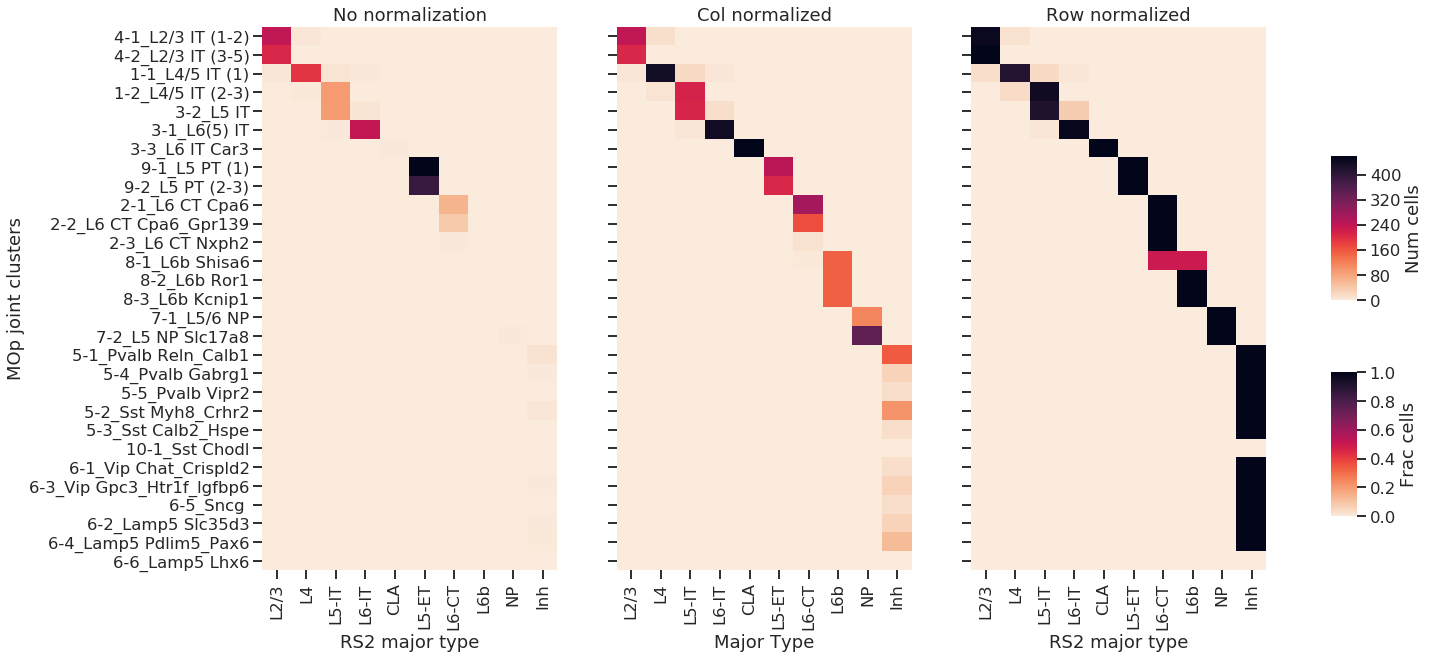

In [188]:
fig, axs = plt.subplots(1, 3, figsize=(6*3,10), sharey=True)
cbar_ax0 = fig.add_axes([0.95, 0.5, 0.02, 0.2])
cbar_ax = fig.add_axes([0.95, 0.2, 0.02, 0.2])
ax = axs[0]
sns.heatmap(conf_mat.fillna(0), 
            yticklabels=["{}_{}".format(y, annot2.loc[y, 'annotation_curated']) for y in conf_mat.index],
            cbar=True,
            cbar_ax=cbar_ax0,
            cmap='rocket_r',
            cbar_kws={'label': 'Num cells'},
            ax=ax,
            )
ax.set_title('No normalization')
ax.set_xlabel('RS2 major type')
ax.set_ylabel('MOp joint clusters')
ax = axs[1]
sns.heatmap(conf_mat.divide(conf_mat.sum(axis=0), axis=1).fillna(0), 
            yticklabels=["{}_{}".format(y, annot2.loc[y, 'annotation_curated']) for y in conf_mat.index],
            cbar=False,
            cmap='rocket_r',
            ax=ax,
            )
ax.set_title('Col normalized')
ax.set_ylabel('')
ax = axs[2]
sns.heatmap(conf_mat.divide(conf_mat.sum(axis=1), axis=0).fillna(0), 
            yticklabels=["{}_{}".format(y, annot2.loc[y, 'annotation_curated']) for y in conf_mat.index],
            cmap='rocket_r',
            cbar_ax=cbar_ax,
            cbar_kws={'label': 'Frac cells'},
            ax=ax,
            )
ax.set_title('Row normalized')
ax.set_xlabel('RS2 major type')
ax.set_ylabel('')
snmcseq_utils.savefig(fig, figure_format.format('01_heatmap_matched_cell_type'))
plt.show()

In [170]:
conf_mat2 = (df_info.groupby(['best_match', 'Target'])
                    .size()
                    .unstack()
                    .reindex(clsts_uniq)[projection_order]
                    .fillna(0)
                    .astype(int)
           )

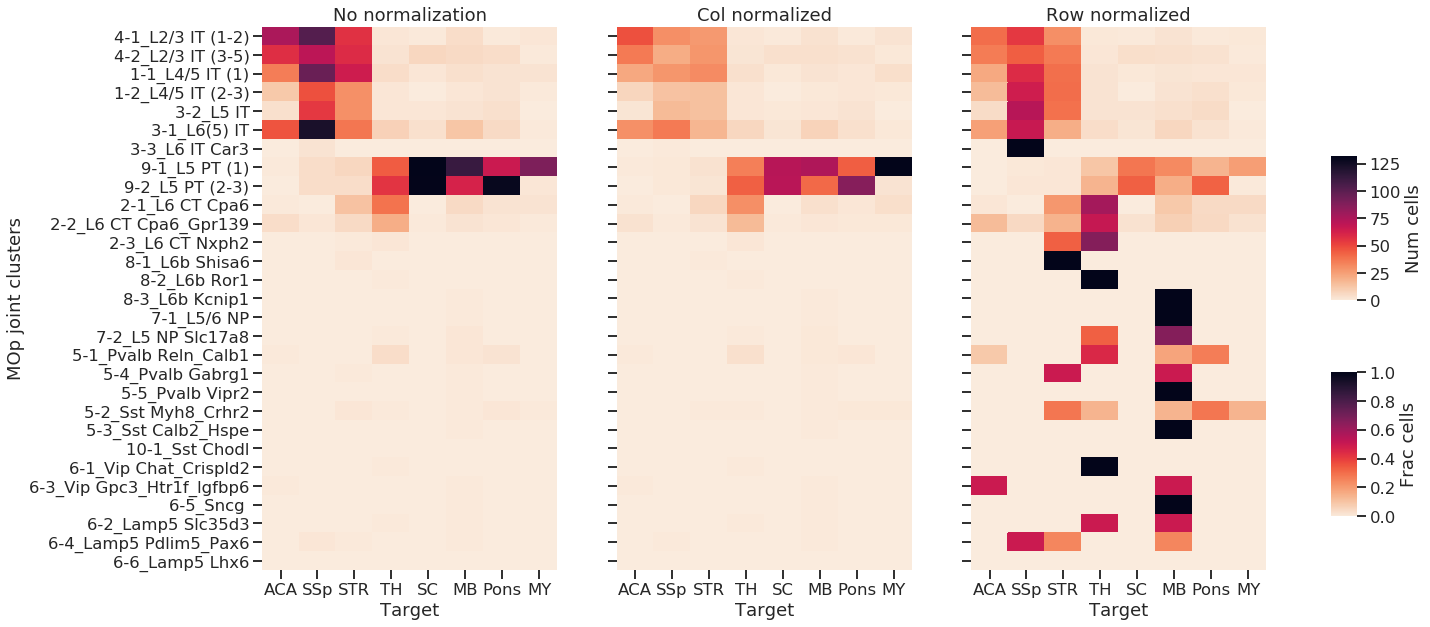

In [189]:
fig, axs = plt.subplots(1, 3, figsize=(6*3,10), sharey=True)
cbar_ax0 = fig.add_axes([0.95, 0.5, 0.02, 0.2])
cbar_ax = fig.add_axes([0.95, 0.2, 0.02, 0.2])
ax = axs[0]
sns.heatmap(conf_mat2.fillna(0), 
            yticklabels=["{}_{}".format(y, annot2.loc[y, 'annotation_curated']) for y in conf_mat2.index],
            cbar=True,
            cbar_ax=cbar_ax0,
            cmap='rocket_r',
            cbar_kws={'label': 'Num cells'},
            ax=ax,
            )
ax.set_title('No normalization')
ax.set_xlabel('Target')
ax.set_ylabel('MOp joint clusters')
ax = axs[1]
sns.heatmap(conf_mat2.divide(conf_mat2.sum(axis=0), axis=1).fillna(0), 
            yticklabels=["{}_{}".format(y, annot2.loc[y, 'annotation_curated']) for y in conf_mat2.index],
            cbar=False,
            cmap='rocket_r',
            ax=ax,
            )
ax.set_title('Col normalized')
ax.set_xlabel('Target')
ax.set_ylabel('')
ax = axs[2]
sns.heatmap(conf_mat2.divide(conf_mat2.sum(axis=1), axis=0).fillna(0), 
            yticklabels=["{}_{}".format(y, annot2.loc[y, 'annotation_curated']) for y in conf_mat2.index],
            cmap='rocket_r',
            cbar_ax=cbar_ax,
            cbar_kws={'label': 'Frac cells'},
            ax=ax,
            )
ax.set_title('Row normalized')
ax.set_xlabel('Target')
ax.set_ylabel('')
snmcseq_utils.savefig(fig, figure_format.format('02_heatmap_celltype_by_projection'))
plt.show()

In [229]:
sorter_idx = pd.Series(clsts_uniq).reset_index().set_index(0)
df_info['max_corr'] = corr.max(axis=1)
df_info['clst_order'] = df_info['best_match'].apply(lambda x: sorter_idx.loc[x]) 
df_info_sorted = df_info.sort_values(['clst_order', 'max_corr'], ascending=[True, False])
cells_idx = df_info_sorted.index.values
print(cells_idx)
df_info_sorted.head()

[1422  677 1434 ..., 1704 2017 1571]


,mCCC,mCH,mCG,# Non-clonal reads,Experiment,Source,Slice,Target,Gender,Major Type,best_match,best_match_annot,tmp,max_corr,clst_order
1422,0.005223,0.020002,0.762250,6594102,Cf3C,MOp,3C,ACA,female,L2/3,4-1,L2/3 IT (1-2),0,0.906601,0
677,0.005325,0.023704,0.760968,3140058,Bm4B_rep2,MOp,4B,SSp,male,L2/3,4-1,L2/3 IT (1-2),0,0.871838,0
1434,0.005641,0.023999,0.763730,2838165,Cm4B,MOp,4B,ACA,male,L2/3,4-1,L2/3 IT (1-2),0,0.870348,0
1441,0.005362,0.022984,0.763015,3369345,Cf3C,MOp,3C,ACA,female,L4,4-1,L2/3 IT (1-2),0,0.870108,0
1433,0.005495,0.023623,0.766444,2828143,Cf3C,MOp,3C,ACA,female,L2/3,4-1,L2/3 IT (1-2),0,0.866330,0


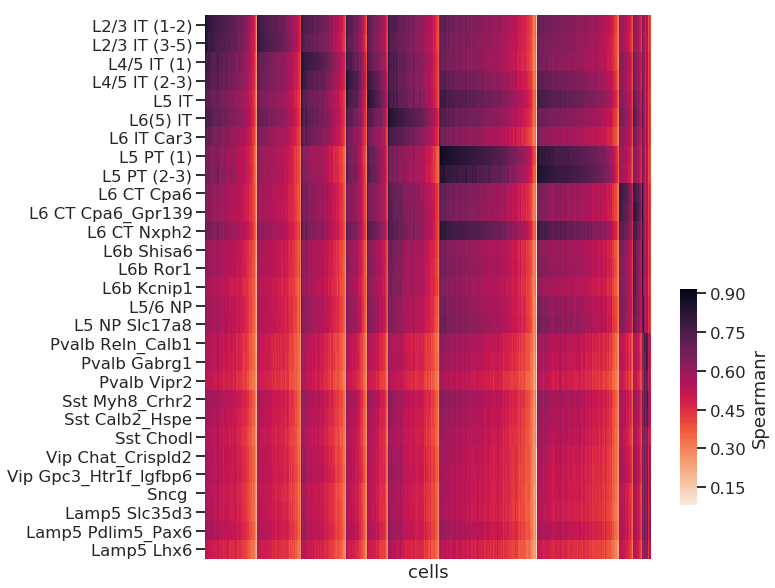

In [241]:
mat_plot = corr[clsts_uniq].reindex(cells_idx)

fig, ax = plt.subplots(figsize=(8,10))
cbar_ax = fig.add_axes([0.95, 0.2, 0.03, 0.3])
sns.heatmap(mat_plot.T, 
            cmap='rocket_r',
            yticklabels=["{}".format(annot2.loc[x, 'annotation_curated']) for x in mat_plot.columns],
            xticklabels=False,
            cbar_ax=cbar_ax,
            cbar_kws={'label': "Spearmanr"},
            rasterized=True,
            ax=ax, 
           )
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
ax.set_xlabel('cells')
snmcseq_utils.savefig(fig, figure_format.format('03_heatmap_celltype_by_cell'))
plt.show()

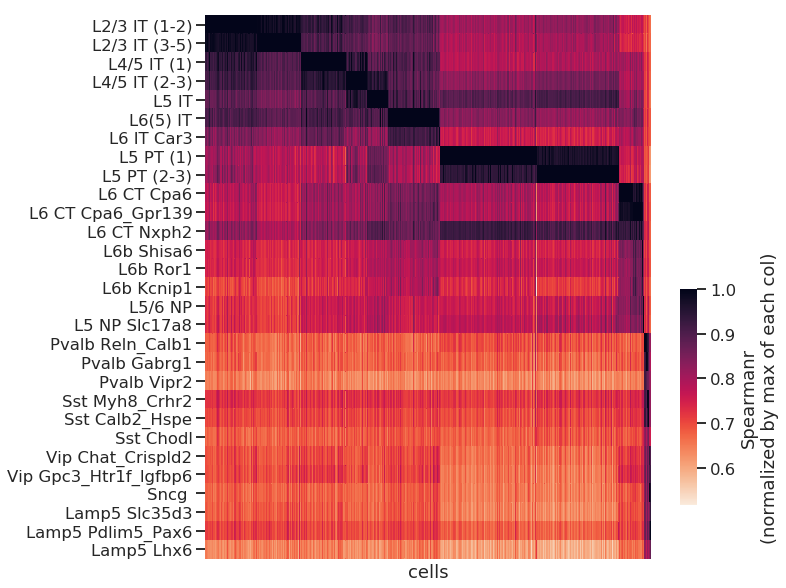

In [246]:
mat_plot = corr[clsts_uniq].reindex(cells_idx)
mat_plot = mat_plot.divide(mat_plot.max(axis=1), axis=0)

fig, ax = plt.subplots(figsize=(8,10))
cbar_ax = fig.add_axes([0.95, 0.2, 0.03, 0.3])
sns.heatmap(mat_plot.T, 
            cmap='rocket_r',
            yticklabels=["{}".format(annot2.loc[x, 'annotation_curated']) for x in mat_plot.columns],
            xticklabels=False,
            cbar_ax=cbar_ax,
            cbar_kws={'label': "Spearmanr\n(normalized by max of each col)"},
            rasterized=True,
            ax=ax
           )
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
ax.set_xlabel('cells')
snmcseq_utils.savefig(fig, figure_format.format('04_heatmap_celltype_by_cell_norm'))
plt.show()